In [ ]:
N,M=map(int,input().split())
BUS = input().split(' ')
num = []
total = 0
for _ in range(N) :
    num.append(input().split(' '))

for i in range(len(BUS)-1):
    total += int(num[(int(BUS[i]))-1][(int(BUS[i+1])-1)])

print(total)

In [ ]:
num[(int(BUS[i]))-1][(int(BUS[i+1])-1)]

In [ ]:
import pandas as pd
df = pd.Series([1,'a'])
df.values

In [ ]:
a = [1,2,3]
max(a)

In [ ]:
kg = int(input())
cnt = []
k_5 = kg//5

for i in range(k_5+1):
    if (kg-(5*i)) % 3 == 0 :
        k_3 = (kg-(5*i)) // 3
        cnt.append(i+(k_3))

if len(cnt) == 0 :
    print(-1)
else :
    print(min(cnt))

In [ ]:
import tensorflow as tf
import pandas as pd
mlb = pd.read_csv('dataset/major_full.csv')

In [ ]:
mlb

In [ ]:
for i in range(len(mlb)):
    mlb['2020PAYROLL'][i].replace(',',"")

In [ ]:
mlb

In [ ]:
mlb['2020PAYROLL']=pd.to_numeric(mlb['2020PAYROLL'])

In [ ]:
mlb['2020PAYROLL']

In [ ]:
display(mlb.describe())

In [ ]:
mlb

In [ ]:
import numpy as np

In [ ]:
mlb_data=mlb.drop('TEAM',axis=1)

In [ ]:
mlb_data

In [ ]:
mlb_norm = (mlb_data-mlb_data.min())/(mlb_data.max()-mlb_data.min())

In [ ]:
mlb_norm

In [ ]:
mlb_shuffle = mlb_norm.sample(frac = 1)

In [ ]:
mlb_shuffle.head()

In [ ]:
mlb_np = mlb_shuffle.to_numpy()

In [ ]:
print(mlb_np[:,:4])

In [ ]:
train_ratio = 0.8
input_cnt = 4
output_cnt = 1

train_idx = int(len(mlb_np)*train_ratio)
print("train_idx : ",train_idx)
print("test_idx : ", len(mlb_np)-train_idx)

In [ ]:
train_X, train_Y = mlb_np[:train_idx,:-output_cnt],mlb_np[:train_idx,-output_cnt]
test_X, test_Y = mlb_np[train_idx:,:-output_cnt],mlb_np[train_idx:,-output_cnt:]

In [ ]:
print(train_X)
print(train_Y)
print(test_X)
print(test_Y)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [ ]:
simple_layer_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,activation='softmax',input_shape=(4,))
])

In [ ]:
simple_layer_model.summary()

In [ ]:
simple_layer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                          loss = 'categorical_crossentropy',
                          metrics = ['accuracy'])

In [ ]:
history_1 = simple_layer_model.fit(train_X,train_Y,epochs=30,batch_size=5)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history_1.history['loss'],'b--o',label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
from sklearn import metrics

In [100]:
mlb_norm = mlb_norm.astype('int')

In [101]:
mlb_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   2020PAYROLL  30 non-null     int32
 1   2020AVG      30 non-null     int32
 2   2020ERA      30 non-null     int32
 3   2020OPS      30 non-null     int32
 4   RANK         30 non-null     int32
dtypes: int32(5)
memory usage: 728.0 bytes


In [103]:
mlb_np = mlb_shuffle.to_numpy()

In [104]:
print(mlb_np[:,:4])

[[0.56443511 0.85714286 0.60714286 0.7539267 ]
 [0.71351139 0.14285714 0.3452381  0.33507853]
 [0.17884233 0.31746032 0.17063492 0.2513089 ]
 [0.56259843 0.41269841 0.35714286 0.27748691]
 [0.02101733 0.17460317 0.61904762 0.        ]
 [0.96018917 0.74603175 0.         0.94240838]
 [0.12812008 0.55555556 0.47222222 0.36649215]
 [0.47614633 0.50793651 0.69444444 0.32984293]
 [0.46049397 0.12698413 0.75793651 0.03664921]
 [0.56595817 0.76190476 0.80555556 0.73298429]
 [0.14968886 0.28571429 0.34920635 0.40314136]
 [0.58318797 0.87301587 0.79365079 0.67015707]
 [0.48114451 0.61904762 0.78571429 0.63874346]
 [0.66761506 0.57142857 0.41666667 0.41361257]
 [0.50112677 0.76190476 0.98412698 0.39267016]
 [0.20297717 0.20634921 0.41269841 0.31937173]
 [0.66093905 1.         0.74206349 0.86910995]
 [0.09130587 0.49206349 0.65873016 0.32460733]
 [0.34124422 0.82539683 0.26587302 0.72251309]
 [0.35629964 0.6984127  0.58730159 0.65445026]
 [0.56092097 0.73015873 0.38888889 0.82198953]
 [0.36355288 

In [105]:
train_ratio = 0.8
input_cnt = 4
output_cnt = 1

train_idx = int(len(mlb_np)*train_ratio)
print("train_idx : ",train_idx)
print("test_idx : ", len(mlb_np)-train_idx)

train_idx :  24
test_idx :  6


In [106]:
train_X, train_Y = mlb_np[:train_idx,:-output_cnt],mlb_np[:train_idx,-output_cnt]
test_X, test_Y = mlb_np[train_idx:,:-output_cnt],mlb_np[train_idx:,-output_cnt:]

In [110]:
print(train_X.shape)

(24, 4)


In [114]:
mlb_df = pd.DataFrame(train_X)
mlb_df.head()

,0,1,2,3
0,0.564435,0.857143,0.607143,0.753927
1,0.713511,0.142857,0.345238,0.335079
2,0.178842,0.317460,0.170635,0.251309
3,0.562598,0.412698,0.357143,0.277487
4,0.021017,0.174603,0.619048,0.000000


array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>,
        <AxesSubplot:xlabel='3', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>,
        <AxesSubplot:xlabel='3', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>,
        <AxesSubplot:xlabel='3', ylabel='2'>],
       [<AxesSubplot:xlabel='0', ylabel='3'>,
        <AxesSubplot:xlabel='1', ylabel='3'>,
        <AxesSubplot:xlabel='2', ylabel='3'>,
        <AxesSubplot:xlabel='3', ylabel='3'>]], dtype=object)

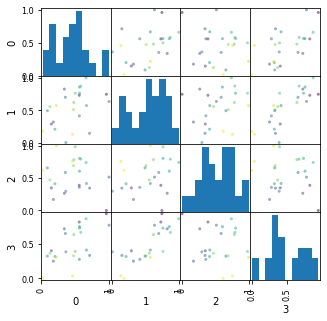

In [115]:
pd.plotting.scatter_matrix(mlb_df,c=train_Y,figsize=(5,5))

In [95]:
mlb_norm = mlb_norm.astype('float')

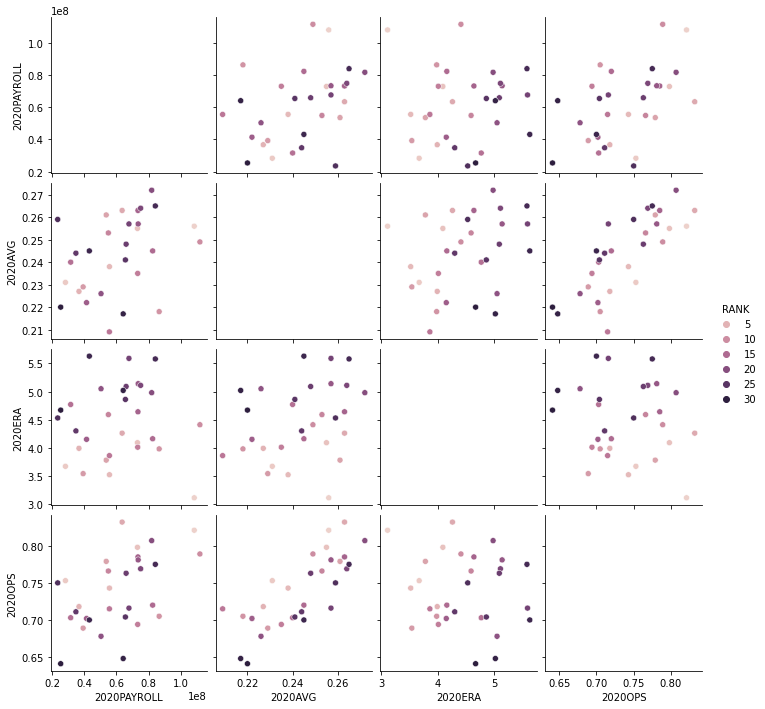

In [117]:
sns.pairplot(mlb,hue='RANK')

In [120]:
mlb_data

,2020PAYROLL,2020AVG,2020ERA,2020OPS,RANK
0,108417397,0.256,3.11,0.821,1
1,28290689,0.231,3.67,0.753,2
2,73097954,0.255,4.09,0.798,3
3,55679689,0.238,3.52,0.743,4
4,36720178,0.227,3.99,0.718,5
5,63561931,0.263,4.26,0.832,6
6,53665251,0.261,3.78,0.779,7
7,39299107,0.229,3.54,0.689,8
8,86596171,0.218,3.98,0.705,9
9,111939081,0.249,4.41,0.789,10


In [153]:
X = mlb_data.iloc[:,:3]
Y = mlb_data.iloc[:,-1:]

In [154]:
X

,2020PAYROLL,2020AVG,2020ERA
0,108417397,0.256,3.11
1,28290689,0.231,3.67
2,73097954,0.255,4.09
3,55679689,0.238,3.52
4,36720178,0.227,3.99
5,63561931,0.263,4.26
6,53665251,0.261,3.78
7,39299107,0.229,3.54
8,86596171,0.218,3.98
9,111939081,0.249,4.41


In [155]:
Y

,RANK
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

In [157]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((22, 3), (8, 3), (22, 1), (8, 1))

In [158]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,Y_train)
pred=model.predict(X_test)
ac_score=metrics.accuracy_score(Y_test,pred)
print("정답률 : ",ac_score)

정답률 :  0.0
